# **Scrapping data with google playstore**

# ***APP Mobile Legends Content Sentiment Analysis Using NLP and K-Means***

In [70]:
!pip install google-play-scraper

**Scrape desired number of reviews**

In [71]:
from google_play_scraper import Sort, reviews

result, continuation_token = reviews(
    'com.mobile.legends', #link app store
    lang = 'id', #defaults to 'en'
    country = 'id', #defaults to 'us'
    sort = Sort.NEWEST, #get data newest
    count = 300, #defaults get try 300 data
    filter_score_with = None #defaults to None(means all score) Use 1 or 2 or 3 or 4 or 5 to select certain score
)

In [72]:
#import pandas and numpy
import pandas as pd
import numpy as np

df_busu = pd.DataFrame(np.array(result), columns=['review'])

df_busu = df_busu.join(pd.DataFrame(df_busu.pop('review').tolist()))

df_busu.head(10)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,ec80c2b6-bc68-4a08-892e-6c3f0b8a28ff,Federics Sumadi,https://play-lh.googleusercontent.com/a/ACg8oc...,"Gamenya bagus sampai saya kasih bintang 5, wal...",5,0,19.2.11.103,2024-09-30 08:37:27,None,NaT,19.2.11.103
1,1edc9344-6d84-45fe-8dc5-de2a265da109,haslinda Iskandar,https://play-lh.googleusercontent.com/a/ACg8oc...,Saya senang main,5,0,19.2.11.103,2024-09-30 08:37:16,None,NaT,19.2.11.103
2,4ed40f72-4260-42e0-a928-7704c2d88bb6,Aisyah Nuha,https://play-lh.googleusercontent.com/a/ACg8oc...,Bagus dan juga keren tapi kok macet terus sihh,5,0,None,2024-09-30 08:37:13,None,NaT,None
3,04f6255a-5c94-4d27-8294-8325c7ff5f1d,Danang asmoro,https://play-lh.googleusercontent.com/a/ACg8oc...,Game nya bagus,5,0,19.2.11.103,2024-09-30 08:37:13,None,NaT,19.2.11.103
4,f7ba9c13-fffe-486d-9ac2-94557db62035,Menyee 321,https://play-lh.googleusercontent.com/a/ACg8oc...,Bagus,5,0,None,2024-09-30 08:36:59,None,NaT,None
5,5f3a68b0-2497-4d9a-b685-081aaf2e841e,Angga,https://play-lh.googleusercontent.com/a-/ALV-U...,Sangat bagus,5,0,19.2.11.103,2024-09-30 08:36:57,None,NaT,19.2.11.103
6,1ea42c12-e38a-4f3b-9585-155f9f6a94f5,alung bhenex,https://play-lh.googleusercontent.com/a/ACg8oc...,kenapa stiap dari akun monton pindah keakun FB...,3,0,None,2024-09-30 08:36:37,None,NaT,None
7,a3cf5dbd-cf90-422b-9e63-a5889b0acded,Ko Ntol,https://play-lh.googleusercontent.com/a/ACg8oc...,kelasss montonnnn!!!!,5,0,19.2.11.103,2024-09-30 08:36:30,None,NaT,19.2.11.103
8,56a9c3ed-2192-4b99-834e-958dde7f74c8,Sani Mawerah,https://play-lh.googleusercontent.com/a-/ALV-U...,ok,5,0,19.2.11.103,2024-09-30 08:36:01,None,NaT,19.2.11.103
9,288a90e3-38ad-45ee-8db1-babaa58a521f,Putra Sampoerna,https://play-lh.googleusercontent.com/a/ACg8oc...,Woy monton masak gua legend maen duo ketemu ep...,1,0,19.2.11.103,2024-09-30 08:36:00,None,NaT,19.2.11.103


In [73]:
#check for get data
len(df_busu.index)

300

In [74]:
df_busu[['userName', 'score', 'at', 'content']].head(10)

,userName,score,at,content
0,Federics Sumadi,5,2024-09-30 08:37:27,"Gamenya bagus sampai saya kasih bintang 5, wal..."
1,haslinda Iskandar,5,2024-09-30 08:37:16,Saya senang main
2,Aisyah Nuha,5,2024-09-30 08:37:13,Bagus dan juga keren tapi kok macet terus sihh
3,Danang asmoro,5,2024-09-30 08:37:13,Game nya bagus
4,Menyee 321,5,2024-09-30 08:36:59,Bagus
5,Angga,5,2024-09-30 08:36:57,Sangat bagus
6,alung bhenex,3,2024-09-30 08:36:37,kenapa stiap dari akun monton pindah keakun FB...
7,Ko Ntol,5,2024-09-30 08:36:30,kelasss montonnnn!!!!
8,Sani Mawerah,5,2024-09-30 08:36:01,ok
9,Putra Sampoerna,1,2024-09-30 08:36:00,Woy monton masak gua legend maen duo ketemu ep...


In [75]:
if 'score' in df_busu.columns:
    Sentiment = []
    for index, row in df_busu.iterrows():
      if row['score'] > 3:
        Sentiment.append('positif')
      else:
        Sentiment.append('negatif')
    df_busu['sentiment'] = Sentiment

In [76]:
# Memilih hanya kolom 'content dan 'Sentiment'
df_busu = df_busu[['content', 'sentiment']]

# Menampilkan sepuluh baris pertama dari DataFrame yang telah difilter
df_busu.head(10)

,content,sentiment
0,"Gamenya bagus sampai saya kasih bintang 5, wal...",positif
1,Saya senang main,positif
2,Bagus dan juga keren tapi kok macet terus sihh,positif
3,Game nya bagus,positif
4,Bagus,positif
5,Sangat bagus,positif
6,kenapa stiap dari akun monton pindah keakun FB...,negatif
7,kelasss montonnnn!!!!,positif
8,ok,positif
9,Woy monton masak gua legend maen duo ketemu ep...,negatif


In [77]:
df_busu.isnull().sum()

,0
content,0
sentiment,0


In [78]:
df_busu.shape

(300, 2)

In [79]:
my_df = df_busu[['content', 'sentiment']]

In [80]:
my_df.to_csv("scrapped_data_mobile_legends.csv", index = False)

# **IMPORTING DATASET**

Dataset didapatkan menggunakan teknik web scraping dari website google playstore. Disini saya menggunakan library pandas untuk menampilkan dan membaca dataset.

In [81]:
import string

data = pd.read_csv('scrapped_data_mobile_legends.csv', sep=',', encoding='latin1')
data.head(10)

,content,sentiment
0,"Gamenya bagus sampai saya kasih bintang 5, wal...",positif
1,Saya senang main,positif
2,Bagus dan juga keren tapi kok macet terus sihh,positif
3,Game nya bagus,positif
4,Bagus,positif
5,Sangat bagus,positif
6,kenapa stiap dari akun monton pindah keakun FB...,negatif
7,kelasss montonnnn!!!!,positif
8,ok,positif
9,Woy monton masak gua legend maen duo ketemu ep...,negatif


**Proses Cleaning Data**

In [82]:
# Proses case folding
def casefolding(Content):
  Content = Content.lower()
  return Content
data['content'] = data['content'].apply(casefolding)
data.head(10)

,content,sentiment
0,"gamenya bagus sampai saya kasih bintang 5, wal...",positif
1,saya senang main,positif
2,bagus dan juga keren tapi kok macet terus sihh,positif
3,game nya bagus,positif
4,bagus,positif
5,sangat bagus,positif
6,kenapa stiap dari akun monton pindah keakun fb...,negatif
7,kelasss montonnnn!!!!,positif
8,ok,positif
9,woy monton masak gua legend maen duo ketemu ep...,negatif


In [83]:
# proses cleansing remove regex (cleansing) seperti tanda baca dan angka angka
import re
import string
def cleansing(Content):
  # Menghapus semua angka dari teks
  Content = re.sub(r'\d+', '', Content)
  # Menghapus semua tanda baca dari teks
  Content = Content.translate(str.maketrans('', '', string.punctuation))
  # Menghapus semua karakter selain huruf dan spasi
  Content = re.sub(r'[^a-zA-Z\s]', '', Content)
  # Menghapus spasi di awal dan akhir teks
  Content = Content.strip(" ")
  # Menghapus simbol tambahan seperti ?, |, $, ., !, _, :, ", ), (, -, +, , dari teks
  Content = re.sub(r'[?|$|.|!_:")(-+,]', '', Content)
  # Mengganti beberapa spasi berturut-turut menjadi satu spasi
  Content = re.sub('\s+', ' ', Content)
  return Content
data['content'] = data['content'].apply(cleansing)
data.head(10)

,content,sentiment
0,gamenya bagus sampai saya kasih bintang walaup...,positif
1,saya senang main,positif
2,bagus dan juga keren tapi kok macet terus sihh,positif
3,game nya bagus,positif
4,bagus,positif
5,sangat bagus,positif
6,kenapa stiap dari akun monton pindah keakun fb...,negatif
7,kelasss montonnnn,positif
8,ok,positif
9,woy monton masak gua legend maen duo ketemu ep...,negatif


In [84]:
!pip install nltk
import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize
#NLIK word tokenize
def word_tokenize_wrapper(text):
  return word_tokenize(text)
data['content'] = data['content'].apply(word_tokenize_wrapper)
data.head(10)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,content,sentiment
0,"[gamenya, bagus, sampai, saya, kasih, bintang,...",positif
1,"[saya, senang, main]",positif
2,"[bagus, dan, juga, keren, tapi, kok, macet, te...",positif
3,"[game, nya, bagus]",positif
4,[bagus],positif
5,"[sangat, bagus]",positif
6,"[kenapa, stiap, dari, akun, monton, pindah, ke...",negatif
7,"[kelasss, montonnnn]",positif
8,[ok],positif
9,"[woy, monton, masak, gua, legend, maen, duo, k...",negatif


In [85]:
# Membaca file CSV untuk kata normalisasi
normalizad_word = pd.read_csv("scrapped_data_mobile_legends.csv")

# Membuat dictionary untuk kata-kata yang dinormalisasi
normalizad_word_dict = {}

for index, row in normalizad_word.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1]

# Fungsi untuk normalisasi kata dalam dokumen
def normalizad_term(document):
    # Pastikan dokumen adalah string, dan split menjadi kata-kata
    if isinstance(document, str):
        words = document.split()
        # Normalisasi setiap kata jika ada dalam dictionary
        normalized_words = [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in words]
        return ' '.join(normalized_words)  # Gabungkan kembali menjadi string
    return document  # Jika bukan string, kembalikan apa adanya

# Terapkan fungsi normalisasi pada kolom 'content'
data = pd.read_csv("scrapped_data_mobile_legends.csv")
data['content'] = data['content'].apply(normalizad_term)

# Tampilkan hanya kolom 'content' dari 10 data pertama
print(data['content'].head(10))

0    Gamenya positif sampai saya kasih bintang 5, w...
1                                     Saya senang main
2     positif dan juga keren tapi kok macet terus sihh
3                                     Game nya positif
4                                              positif
5                                       Sangat positif
6    kenapa stiap dari akun monton pindah keakun FB...
7                                kelasss montonnnn!!!!
8                                              positif
9    Woy monton masak gua legend maen duo ketemu ep...
Name: content, dtype: object


<ipython-input-85-cecd4c26c944>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if row[0] not in normalizad_word_dict:
<ipython-input-85-cecd4c26c944>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  normalizad_word_dict[row[0]] = row[1]


In [86]:
import nltk
import pandas as pd

# Download stopwords bahasa Indonesia dan Inggris
nltk.download('stopwords')
from nltk.corpus import stopwords

# Membaca dataset
data = pd.read_csv("scrapped_data_mobile_legends.csv")

# Fungsi untuk menghapus stopword
def stopword_removal(content):
    # Gabungkan stopwords bahasa Indonesia dan Inggris
    filtering = stopwords.words('indonesian') + stopwords.words('english')

    # Lakukan filter untuk menghapus stopwords
    filtered_content = [word for word in content.split() if word.lower() not in filtering]
    return ' '.join(filtered_content)

# Terapkan fungsi stopword_removal hanya pada kolom 'content'
data['content'] = data['content'].apply(stopword_removal)

# Tampilkan 10 data pertama dari kolom 'content' saja
print(data['content'].head(10))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0    Gamenya bagus kasih bintang 5, defeat gm4 mast...
1                                          senang main
2                               Bagus keren macet sihh
3                                       Game nya bagus
4                                                Bagus
5                                                bagus
6    stiap akun monton pindah keakun FB mendowdlod ...
7                                kelasss montonnnn!!!!
8                                                   ok
9    Woy monton masak gua legend maen duo ketemu ep...
Name: content, dtype: object


# **Proses Stemming dan Membuat file data baru (dataset yang sudah dibersihkan melalui proses NLTK)**

In [87]:
# Install Sastrawi package
!pip install Sastrawi

import pandas as pd
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Fungsi untuk stemming
def stemming(content):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    # Pisahkan konten menjadi kata-kata jika itu string
    if isinstance(content, str):
        words = content.split()
        stemmed_words = [stemmer.stem(word) for word in words]  # Stem setiap kata
        return ' '.join(stemmed_words)  # Gabungkan kembali menjadi string
    return content  # Jika bukan string, kembalikan apa adanya

# Membaca data CSV
data = pd.read_csv("scrapped_data_mobile_legends.csv")

# Terapkan fungsi stemming hanya pada kolom 'content'
data['content'] = data['content'].apply(stemming)

# Menghapus baris kosong pada kolom 'content' setelah proses stemming
data_clean = data[data['content'].str.strip() != '']

# Simpan hasil ke file CSV
data_clean.to_csv('mobilelegend_databersih.csv', index=False)

# Tampilkan data bersih (hanya kolom 'content') tanpa nomor baris
print(data_clean['content'].to_string(index=False))

gamenya bagus sampai saya kasih bintang 5 walau...
                                  saya senang main
    bagus dan juga keren tapi kok macet terus sihh
                                    game nya bagus
                                             bagus
                                      sangat bagus
kenapa stiap dari akun monton pindah akun fb ha...
                                 kelasss montonnnn
                                                ok
woy monton masak gua legend maen duo ketemu epi...
apa lah draksistem mulu gw dapat mau myitic gag...
tolong beri lah dm sm aku moontong untuk spin s...
                  bagus tapi gampang kalah kek anj
  sangattt ramah moonton makin kesini makin kesana
                              gamenya sangat bagus
game yang sangat seru bnyak hadiah event yg kel...
                                seru banget sumpah
                             sangan puas dan bagus
                                    lumayan baguss
                           bla 

In [88]:
import string
from sklearn.pipeline import make_pipeline
import pandas as pd
import numpy as np
import re

In [89]:
data_clean = pd.read_csv('mobilelegend_databersih.csv', encoding='latin1')
data_clean.head(10)

,content,sentiment
0,gamenya bagus sampai saya kasih bintang 5 wala...,positif
1,saya senang main,positif
2,bagus dan juga keren tapi kok macet terus sihh,positif
3,game nya bagus,positif
4,bagus,positif
5,sangat bagus,positif
6,kenapa stiap dari akun monton pindah akun fb h...,negatif
7,kelasss montonnnn,positif
8,ok,positif
9,woy monton masak gua legend maen duo ketemu ep...,negatif


In [90]:
data_clean = data_clean.astype({'sentiment': 'category'})
data_clean = data_clean.astype({'content': 'string'})
data_clean.dtypes

,0
content,string[python]
sentiment,category


# **Proses TF-IDF**

In [91]:
# PROSES TF IDF
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data_clean['content'].astype('U'))

tf = TfidfVectorizer()

# Convert NaNs to empty strings
data_clean['content'] = data_clean['content'].fillna('')

text_tf = tf.fit_transform(data_clean['content'])
print(text_tf)

  (0, 252)	0.2030389840478329
  (0, 73)	0.11760072907508322
  (0, 695)	0.4669454090461882
  (0, 709)	0.16280779391963643
  (0, 366)	0.16280779391963643
  (0, 122)	0.21567011928763669
  (0, 844)	0.24610383976289787
  (0, 183)	0.26390642499835526
  (0, 177)	0.18172199745615625
  (0, 273)	0.26390642499835526
  (0, 494)	0.24610383976289787
  (0, 814)	0.1530103242667011
  (0, 539)	0.20890189050086672
  (0, 364)	0.26390642499835526
  (0, 326)	0.26390642499835526
  (0, 552)	0.17846817002560553
  (0, 132)	0.2334727045230941
  (0, 333)	0.2030389840478329
  (1, 709)	0.48288202585907963
  (1, 721)	0.7827369075668242
  (1, 471)	0.39261671211877364
  (2, 73)	0.20015269772621155
  (2, 173)	0.26041870167649694
  (2, 348)	0.3555443684125351
  (2, 385)	0.29859147331510555
  :	:
  (297, 177)	0.16427535926517353
  (297, 471)	0.23933039232320552
  (297, 173)	0.13832021627572907
  (297, 251)	0.2735197648102343
  (297, 331)	0.39325095066152627
  (297, 834)	0.1709059406386398
  (297, 178)	0.14524051591122683

# **Proses Cosine Similarity**

In [92]:
# Import cosine_similiarity metrics
from sklearn.metrics.pairwise import cosine_similarity

In [93]:
# compute similarity using cosine similarity
cos_sim = cosine_similarity(text_tf, text_tf)
print(cos_sim)

[[1.         0.07861696 0.0235381  ... 0.         0.02985245 0.        ]
 [0.07861696 1.         0.         ... 0.         0.09396511 0.        ]
 [0.0235381  0.         1.         ... 0.         0.03602117 0.        ]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.02985245 0.09396511 0.03602117 ... 0.         1.         0.05592142]
 [0.         0.         0.         ... 0.         0.05592142 1.        ]]


In [94]:
# splitting data
import collections, numpy
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cos_sim, data_clean['sentiment'], test_size=0.3, random_state=33)
print("Jumlah Data Uji:", X_test.shape)
print("Jumlah Data Latih:", X_train.shape)

# Ensure consistent casing
y_test = y_test.str.upper()
y_train = y_train.str.upper()

pos = (y_test == 'POSITIF').sum()
neg = (y_test == 'NEGATIF').sum()
postrain = (y_train == 'POSITIF').sum()
negtrain = (y_train == 'NEGATIF').sum()
total = pos + neg
print("Jumlah data uji dengan sentimen positif:", pos)
print("Jumlah data uji dengan sentimen negatif:", neg)
print("Jumlah data latih dengan sentimen positif:", postrain)
print("Jumlah data uji dengan sentimen negatif:", negtrain)
data_clean['sentiment'].value_counts()

Jumlah Data Uji: (90, 299)
Jumlah Data Latih: (209, 299)
Jumlah data uji dengan sentimen positif: 53
Jumlah data uji dengan sentimen negatif: 37
Jumlah data latih dengan sentimen positif: 129
Jumlah data uji dengan sentimen negatif: 80


,count
sentiment,
positif,182
negatif,117


# **Perform Algoritma K-Means**

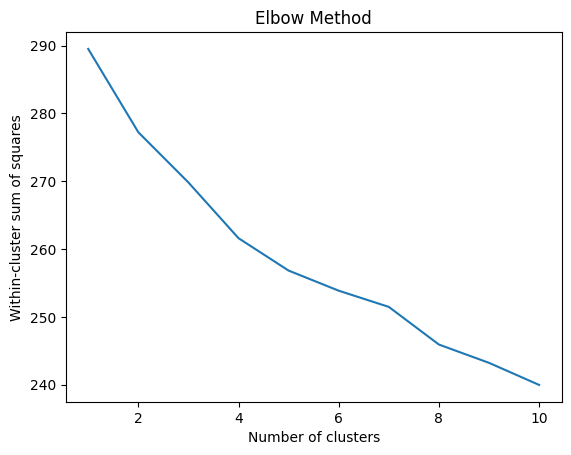

In [95]:
import pandas as pd
from openpyxl import load_workbook
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# elbow method (teknik untuk menentukan jumlah klaster yang optimal dalam k-means clustering.)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(text_tf)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of squares')
plt.show()

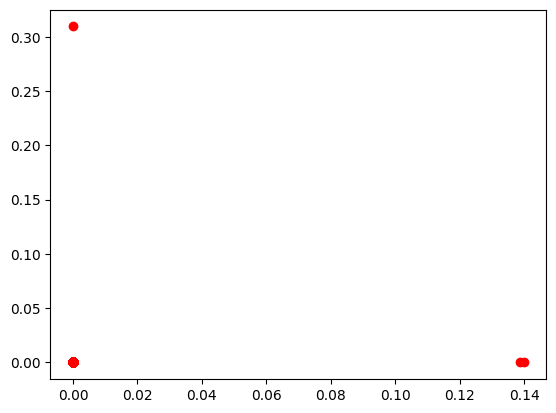

In [96]:
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix

# Convert the sparse matrix to a dense array (NumPy array) if you have enough memory
text_tf_dense = text_tf.toarray()

plt.plot(text_tf_dense[:,0], text_tf_dense[:,1], 'ro')
plt.show()

# **Training the K-Means model on the dataset**

In [97]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(text_tf)

In [98]:
print(y_kmeans)

[2 2 1 0 0 0 1 1 1 2 4 1 4 1 0 2 1 1 1 1 1 1 0 2 1 2 1 1 1 2 3 3 2 1 4 2 1
 1 3 2 1 4 1 1 2 2 1 2 3 0 4 1 1 1 1 1 1 1 1 2 2 1 1 1 2 3 1 1 4 1 3 0 2 1
 1 1 3 2 3 0 0 3 4 4 2 1 1 3 1 2 0 1 3 4 3 1 2 1 0 2 2 3 1 1 1 1 0 3 0 2 1
 0 2 3 3 3 1 1 3 0 4 2 2 1 4 2 2 1 2 4 1 2 4 1 4 1 1 1 1 3 4 1 3 1 1 2 1 1
 1 4 1 1 1 1 4 4 1 3 1 4 4 1 1 3 1 1 2 1 1 3 1 1 3 3 1 3 1 1 2 1 3 1 1 3 2
 0 2 1 3 0 2 1 2 1 1 1 2 3 1 1 4 3 3 1 4 2 3 1 3 1 1 4 2 1 1 0 2 0 1 1 1 1
 1 0 3 1 1 1 1 1 3 0 3 1 3 3 1 1 2 2 0 4 3 2 3 1 1 2 3 3 3 1 2 1 3 1 2 4 3
 3 2 1 1 3 2 4 0 1 3 4 2 3 1 3 2 1 1 1 1 1 1 3 0 4 1 2 1 3 1 4 0 3 2 3 1 4
 2 2 3]


# **Visualising the clusters**

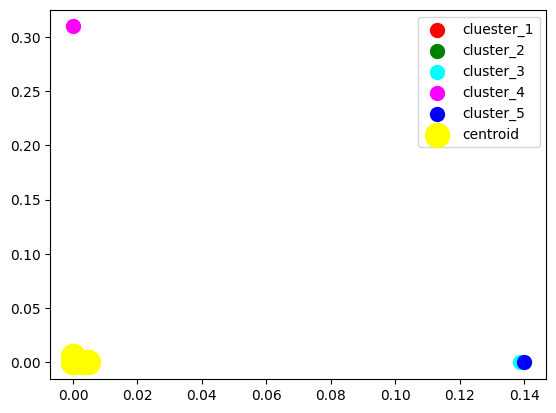

In [99]:
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix

# Assuming text_tf is a csr_matrix
text_tf_dense = text_tf.toarray()

# Use the dense array for plotting
plt.scatter(text_tf_dense[y_kmeans == 0, 0], text_tf_dense[y_kmeans == 0, 1], s=100, c='red', label='cluester_1')
plt.scatter(text_tf_dense[y_kmeans == 1, 0], text_tf_dense[y_kmeans == 1, 1], s=100, c='green', label='cluster_2')
plt.scatter(text_tf_dense[y_kmeans == 2, 0], text_tf_dense[y_kmeans == 2, 1], s=100, c='cyan', label='cluster_3')
plt.scatter(text_tf_dense[y_kmeans == 3, 0], text_tf_dense[y_kmeans == 3, 1], s=100, c='magenta', label='cluster_4')
plt.scatter(text_tf_dense[y_kmeans == 4, 0], text_tf_dense[y_kmeans == 4, 1], s=100, c='blue', label='cluster_5')


# Corrected line for cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='centroid')

plt.legend()
plt.show()

# **Popular Keywords**

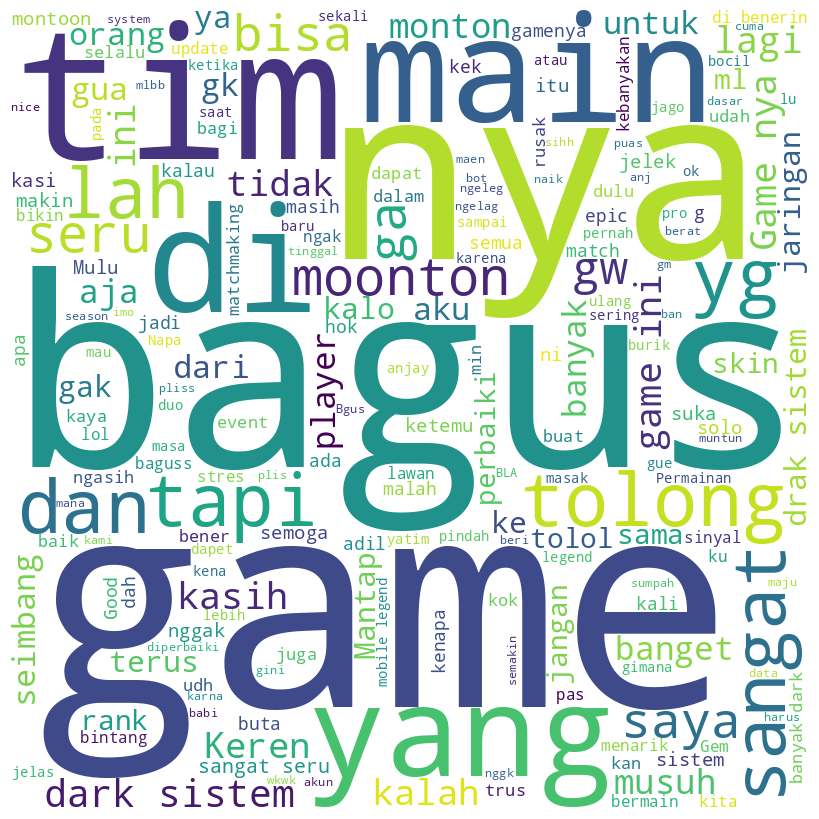

In [100]:
from wordcloud import WordCloud

data = pd.read_csv('scrapped_data_mobile_legends.csv')
data_content = ' '.join(data['content'].dropna().values)
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(data_content)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

Kode tersebut menghasilkan awan kata berdasarkan teks deskripsi dalam kumpulan data, agar dapat menganalisis secara visual kata-kata paling umum yang digunakan dalam fitur ulasan google play store. Semakin besar kata di cloud, semakin sering kata tersebut muncul di kotak deskripsi.

# **Rata - rata rating untuk setiap sentimen**

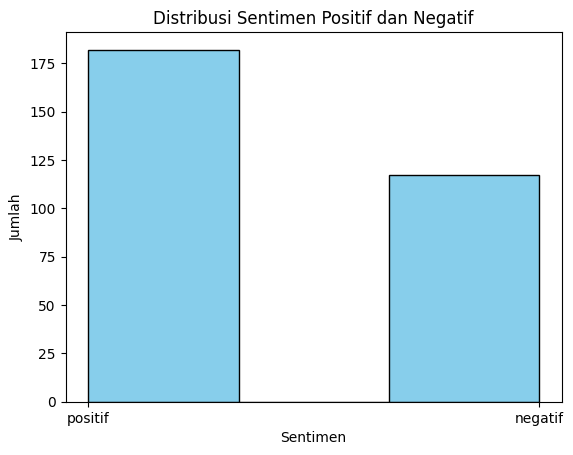

In [115]:
# Buat diagram batang untuk distribusi sentimen
plt.hist(data_clean['sentiment'], bins=3, color='skyblue', edgecolor='black')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.title('Distribusi Sentimen Positif dan Negatif')
plt.show()

# Membuat tabel dengan nilai per kategori sentimen
bins = ['POSITIF', 'NEGATIF']  # Kategori sentimen

# Assuming 'sentiment' column contains strings like 'POSITIF', 'NEGATIF'
data_clean['cluster'] = data_clean['sentiment'].str.upper().apply(lambda x: x if x in bins else 'OTHER')

# **Sentimen Analysis**

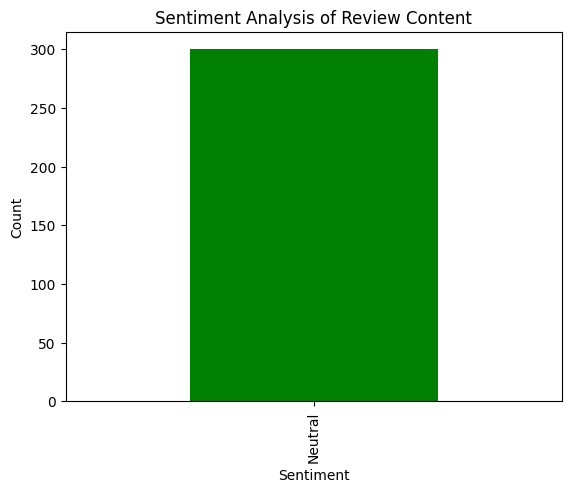

In [102]:
#Classify sentiment
def sentiment_analysis(text):
    analysis = TextBlob(text)
    #threshold for positive and negative sentiments
    if analysis.sentiment.polarity > 0.1:
        return 'Positive'
    elif analysis.sentiment.polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

#Applying sentiment analysis to the review content
reviews = data['sentiment']
reviews_sentiments = reviews.apply(sentiment_analysis)

# Counting the occurrences of each sentiment
sentiment_counts = reviews_sentiments.value_counts()

sentiment_counts.plot(kind='bar', color=['green', 'blue', 'red'], title='Sentiment Analysis of Review Content')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()